In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


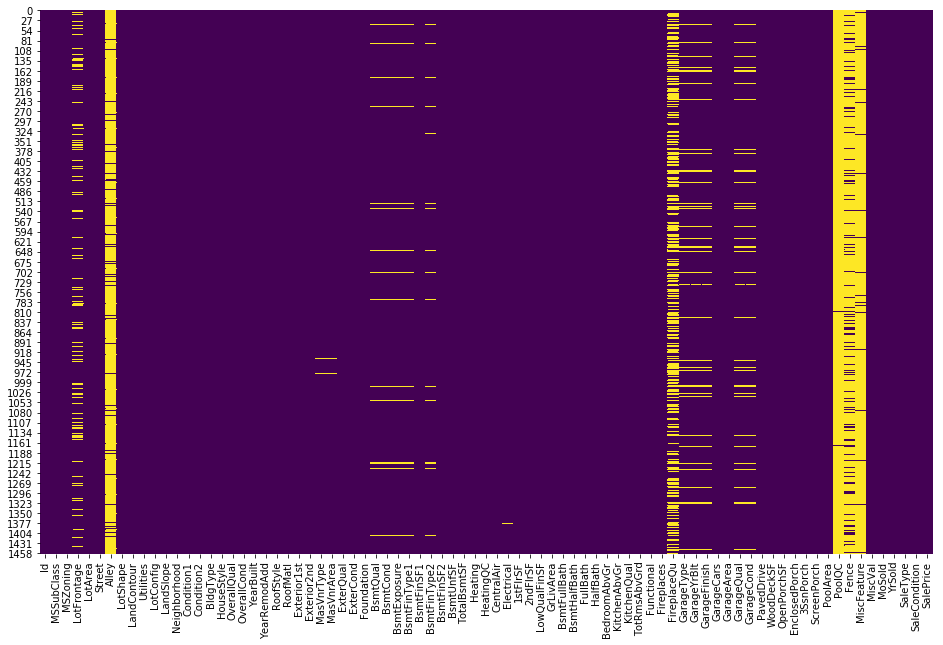

In [4]:
plt.figure(figsize=(16, 10))
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

In [ ]:
#Originally worked with this to take categorical data and change it to integer values.
#Decided that using a function would be cleaner and overall better. 
"""
cleanup = {'MSZoning': {'RL': 0, 'RM': 1, 'FV' : 2, 'RH' : 3, 'C (all)' : 4},
           'Street': {'Pave': 0, 'Grvl': 1},
           'LotShape' : {'Reg' : 0, 'IR1' : 1, 'IR2' : 2, 'IR3' : 3},
           'LandContour' : {'Lvl' : 0, 'Bnk' : 1, 'HLS' : 2, 'Low' : 3},
           'SaleType' : {'WD' : 0, 'New' : 1, 'COD' : 2, 'ConLD' : 3, 'ConLw' : 4, 'ConLI' : 5, 'CWD' : 6, 'Oth' : 7, 'Con' : 8},
           'SaleCondition' : {'Normal' : 0, 'Partial' : 1, 'Abnorml' : 2, 'Family' : 3, 'Alloca' : 4, 'AdjLand' : 5}}
"""

In [5]:
# Function used to check if a feature is categorical, and if so
# change it to integer values. 
def catToInt(train, col, datalength=1460):
    if train[col].dtype!='object': # if it's not categorical..
        return train
    elif len([i for i in train[col].T.notnull() if i == True])!= datalength: # if there's missing data.. .T is transpose.
        print('feature',col,'is missing data.')
        return train
    else:
        train1 = train
        counts = train1[col].value_counts() # get the counts for each label for the feature
        train1[col] = [counts.index.tolist().index(i) for i in train1[col]] # do the conversion
        return train1 # make the new (integer) column from the conversion
# Here we can test our function out. 
fcntest = catToInt(train,'LotShape')
fcntest.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,0,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000


In [6]:
#Notice that LotFrontage is missing ~17% of the data, so we will delete that category as well.
#For the rest of the data, we will will in the missing data. 
missing_data_total = train.isnull().sum().sort_values(ascending = False)
missing_data_percent = (train.isnull().sum()/train.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([missing_data_total,missing_data_percent],axis = 1,keys = ['Total','Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


In [7]:
#Dropping data that is missing values
train = train.drop((missing_data[missing_data['Total'] > 1]).index,axis = 1)
train = train.drop(train.loc[train['Electrical'].isnull()].index)
train.isnull().sum().max()

0

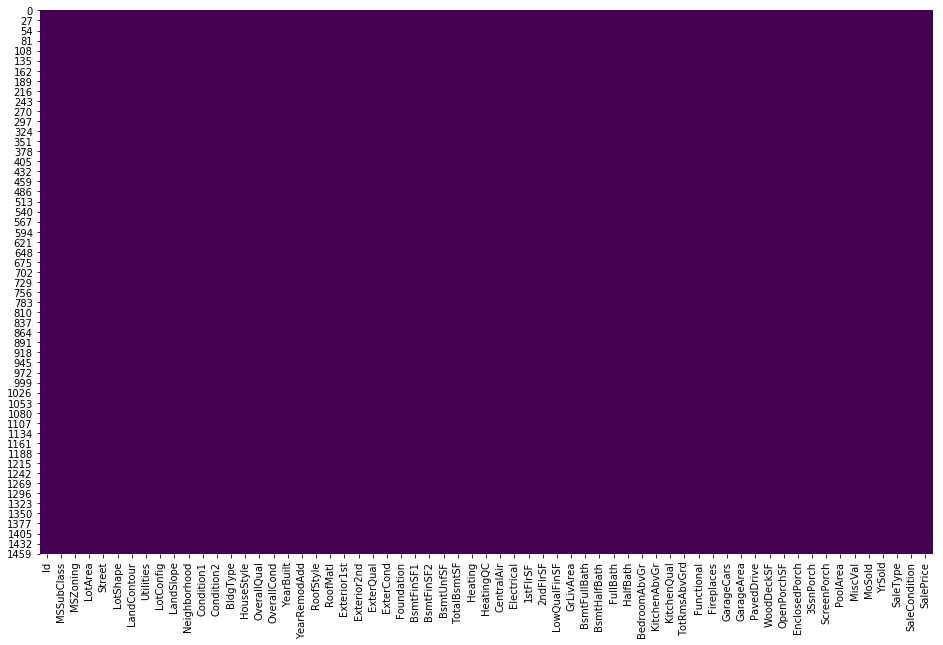

In [8]:
#Checking to see that we haven't missed any missing values. 
plt.figure(figsize=(16, 10))
sns.heatmap(train.isnull(),cbar=False,cmap='viridis')

C:\Users\jpkli\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


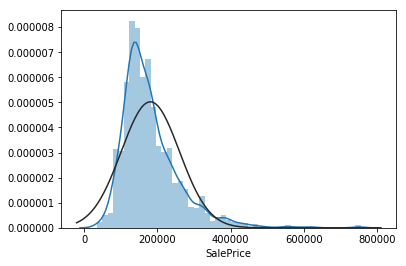

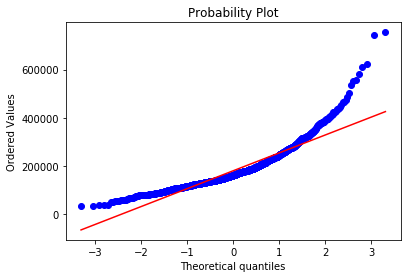

In [9]:
#Want to check for normality. 
#We can use a data transformation to help normalize our data. 
sns.distplot(train['SalePrice'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)

C:\Users\jpkli\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


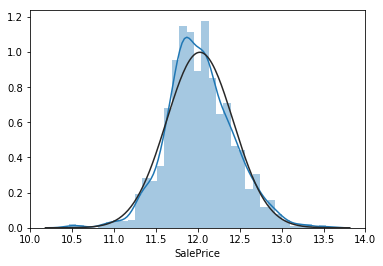

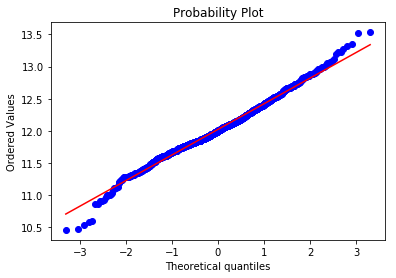

In [10]:
#Transforming and normalizing the data using a log transform. 
train['SalePrice'] = np.log(train['SalePrice'])
sns.distplot(train['SalePrice'],fit=norm);
fig = plt.figure()
res = stats.probplot(train['SalePrice'],plot=plt)

In [13]:
# Now we want to work on feature selection. Which features are useful 
# and which are overkill for our purposes. 
import sklearn.feature_selection as fs

train = pd.read_csv('train.csv')
train['SalePrice'] = np.log(train['SalePrice'])
included_features = [column for column in list(train)
                    if len([i for i in train[column].T.notnull() 
                    if i == True]) == 1460 and column != 'SalePrice' and column != 'Id']

In [18]:
X = train[included_features]
y = train[['SalePrice']]
ylist = [i for i in y['SalePrice']]
X_test = test[included_features]
for column in list(X):
    if X[column].dtype == 'object':
        X = catToInt(X, column)
X.head()


C:\Users\jpkli\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,0,8450,0,0,0,0,0,0,1,...,61,0,0,0,0,0,2,2008,0,0
1,20,0,9600,0,0,0,0,3,0,22,...,0,0,0,0,0,0,5,2007,0,0
2,60,0,11250,0,1,0,0,0,0,1,...,42,0,0,0,0,0,9,2008,0,0
3,70,0,9550,0,1,0,0,1,0,11,...,35,272,0,0,0,0,2,2006,0,2
4,60,0,14260,0,1,0,0,3,0,13,...,84,0,0,0,0,0,12,2008,0,0


In [19]:
#To figure out which features we want to use, we will use 
#Mutual Information Regression Metric
#This measures the dependence between two random variables. 

result = fs.mutual_info_regression(X,ylist)

feature_importance = []

for i in np.arange(len(included_features)):
    feature_importance.append([included_features[i], result[i]])


C:\Users\jpkli\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


In [24]:
scores_sorted = sorted(np.array(feature_importance), key = lambda s: float(s[1]), reverse = True)

In [25]:
scores_sorted

[array(['OverallQual', '0.5258899484115382'], dtype='<U21'),
 array(['GrLivArea', '0.37503509256328416'], dtype='<U21'),
 array(['GarageCars', '0.3641383229630133'], dtype='<U21'),
 array(['ExterQual', '0.33208231968104296'], dtype='<U21'),
 array(['KitchenQual', '0.3263179696393661'], dtype='<U21'),
 array(['GarageArea', '0.28733771777818307'], dtype='<U21'),
 array(['TotalBsmtSF', '0.2600953072991685'], dtype='<U21'),
 array(['FullBath', '0.25877967855508066'], dtype='<U21'),
 array(['YearBuilt', '0.25623318848207255'], dtype='<U21'),
 array(['1stFlrSF', '0.2512803775561281'], dtype='<U21'),
 array(['YearRemodAdd', '0.20938819604395809'], dtype='<U21'),
 array(['Foundation', '0.19721353783248396'], dtype='<U21'),
 array(['TotRmsAbvGrd', '0.1857066343818108'], dtype='<U21'),
 array(['HeatingQC', '0.1667498718194067'], dtype='<U21'),
 array(['Fireplaces', '0.16307609212805008'], dtype='<U21'),
 array(['BsmtFinSF1', '0.12669291051030118'], dtype='<U21'),
 array(['OverallCond', '0.117232

In [89]:
#Using this info, I will take the top 40 features in my prediction
numFeatures = 43
numTrees = 55
included_features = np.array(scores_sorted)[:,0][:numFeatures]


In [90]:
from sklearn.ensemble import RandomForestRegressor as rfr
from sklearn.model_selection import cross_val_score

In [91]:

X = train[included_features]
y = train[['SalePrice']]

for col in list(X):
    if X[col].dtype == 'object':
        X = catToInt(X,col)
        
y_list = [i for i in y['SalePrice']]

np.random.seed(10)
model = rfr(n_estimators = numTrees, max_depth = None)
score_rfr = cross_val_score(model,X,y_list,cv = 10, scoring = 'explained_variance')

model.fit(X,y_list)

C:\Users\jpkli\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=55, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [92]:
test = pd.read_csv('test.csv')

In [93]:
def catToInt(test, col, datalength=1460):
    if test[col].dtype!='object': # if it's not categorical..
        return test
    else:
        test1 = test
        counts = test1[col].value_counts() # get the counts for each label for the feature
        test1[col] = [counts.index.tolist().index(i) if i in counts.index.tolist()
                      else 0
                      for i in test1[col]] # do the conversion
        return test1

In [94]:

X_test = test[included_features]
for col in list(X_test):
    if X_test[col].dtype=='object':
        X_test = catToInt(X_test, col, datalength=1459)

y_output = model.predict(X_test.fillna(0)) 
print(y_output)

C:\Users\jpkli\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


[11.70476325 11.94117641 12.08043161 ... 12.0209881  11.65546185
 12.34362506]


In [95]:
y_output = np.exp(y_output)

In [96]:
saleprice = pd.DataFrame(y_output, columns = ['SalePrice'])
results = pd.concat([test['Id'],saleprice['SalePrice']],axis = 1)

In [97]:
results.head()

,Id,SalePrice
0,1461,121147.398130
1,1462,153457.112603
2,1463,176386.273885
3,1464,181142.073582
4,1465,197410.355300


In [98]:
results.to_csv('houseprice_submission.csv',index=False)